<a href="https://colab.research.google.com/github/Alagammaipl/Customer-conversion-prediction/blob/main/Customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uploading and converting data to dataframe

In [7]:
import pandas as pd
df = pd.read_csv("/content/train (1).csv")

In [8]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [9]:
df.shape

(32773, 11)

# Dropping duplicate entities

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(32767, 11)

In [12]:
df.isnull().sum()

age               0
job               0
marital           1
education_qual    1
call_type         1
day               1
mon               1
dur               1
num_calls         1
prev_outcome      1
y                 1
dtype: int64

In [13]:
df.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day               float64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

In [14]:
df.describe()

,age,day,dur,num_calls
count,32767.000000,32766.000000,32766.000000,32766.000000
mean,41.058260,16.499725,254.719618,3.017152
std,9.618344,8.481715,262.884323,3.465002
min,19.000000,1.000000,0.000000,1.000000
25%,33.000000,9.000000,100.000000,1.000000
50%,40.000000,17.000000,173.000000,2.000000
75%,49.000000,23.000000,309.000000,3.000000
max,94.000000,31.000000,4918.000000,63.000000


#Outliers correction

In [15]:
max = df.age.mean()+3*df.age.std()
min = df.age.mean()-3*df.age.std()
print(min,max)

12.203228531088541 69.91329113809081


In [16]:
import numpy as np
df.age = np.where(df.age>max, max,
    np.where(df.age<min,min,
        df.age))

In [17]:
df.describe()

,age,day,dur,num_calls
count,32767.000000,32766.000000,32766.000000,32766.000000
mean,41.046135,16.499725,254.719618,3.017152
std,9.575009,8.481715,262.884323,3.465002
min,19.000000,1.000000,0.000000,1.000000
25%,33.000000,9.000000,100.000000,1.000000
50%,40.000000,17.000000,173.000000,2.000000
75%,49.000000,23.000000,309.000000,3.000000
max,69.913291,31.000000,4918.000000,63.000000


In [18]:
max = df.dur.mean()+3*df.dur.std()
min = df.dur.mean()-3*df.dur.std()
print(min,max)

-533.9333514913415 1043.3725872845419


In [19]:
df.dur = np.where(df.dur>max, max,
    np.where(df.dur<min,min,
        df.dur))

In [20]:
max = df.num_calls.mean()+3*df.num_calls.std()
min = df.num_calls.mean()-3*df.num_calls.std()
print(min,max)

-7.377853339220213 13.412157190773652


In [21]:
df.num_calls = np.where(df.num_calls>max,max,
    np.where(df.num_calls<min,min, df.num_calls))

In [22]:
df.describe()

,age,day,dur,num_calls
count,32767.000000,32766.000000,32766.000000,32766.000000
mean,41.046135,16.499725,246.895079,2.870392
std,9.575009,8.481715,223.593941,2.634379
min,19.000000,1.000000,0.000000,1.000000
25%,33.000000,9.000000,100.000000,1.000000
50%,40.000000,17.000000,173.000000,2.000000
75%,49.000000,23.000000,309.000000,3.000000
max,69.913291,31.000000,1043.372587,13.412157


#data cleaning

In [23]:
df.job.value_counts()

blue-collar      7291
management       6891
technician       5842
admin.           3516
services         3077
retired          1267
self-employed    1194
entrepreneur     1189
housemaid         987
unemployed        972
student           318
unknown           222
managem             1
Name: job, dtype: int64

In [24]:
import numpy as np
df.job = df.job.replace("unknown", np.nan)

In [25]:
df.job = df.job.fillna("blue-collar")

In [26]:
df.job.value_counts()

blue-collar      7513
management       6891
technician       5842
admin.           3516
services         3077
retired          1267
self-employed    1194
entrepreneur     1189
housemaid         987
unemployed        972
student           318
managem             1
Name: job, dtype: int64

In [27]:
df.marital.value_counts()

married     20475
single       8382
divorced     3909
Name: marital, dtype: int64

In [28]:
df.education_qual.value_counts()

secondary    16943
tertiary      9359
primary       5159
unknown       1305
Name: education_qual, dtype: int64

In [29]:
df.education_qual = df.education_qual.replace("unknown", "secondary")

In [30]:
df.education_qual.value_counts()

secondary    18248
tertiary      9359
primary       5159
Name: education_qual, dtype: int64

In [31]:
df.call_type.value_counts()

cellular     18236
unknown      12762
telephone     1768
Name: call_type, dtype: int64

In [32]:
df.mon.value_counts()

may    7956
jul    6379
aug    5213
jun    4484
nov    3598
feb    2296
apr    1313
jan    1176
mar     258
oct      80
dec      13
Name: mon, dtype: int64

In [33]:
df.prev_outcome.value_counts()

unknown    30275
failure     1768
other        629
success       94
Name: prev_outcome, dtype: int64

In [34]:
df.y.value_counts()

no     30781
yes     1985
Name: y, dtype: int64

[]

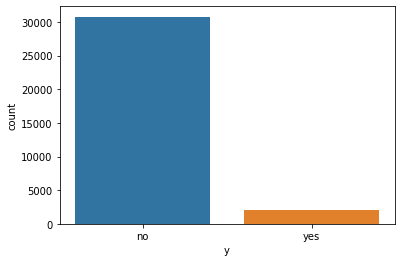

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = df.y, data = df)
plt.plot()

In [36]:
df["target"] = df["y"].map({"yes":1, "no":0})

In [37]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no,0.0
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no,0.0
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no,0.0
3,47.0,blue-collar,married,secondary,unknown,5.0,may,92.0,1.0,unknown,no,0.0
4,33.0,blue-collar,single,secondary,unknown,5.0,may,198.0,1.0,unknown,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32768,30.0,blue-collar,married,secondary,cellular,17.0,apr,191.0,1.0,failure,no,0.0
32769,39.0,blue-collar,married,primary,cellular,17.0,apr,206.0,1.0,unknown,no,0.0
32770,29.0,technician,married,secondary,cellular,17.0,apr,367.0,3.0,failure,yes,1.0
32771,39.0,management,married,secondary,telephone,17.0,apr,141.0,4.0,unknown,no,0.0


In [38]:
df.groupby("job")["target"].mean()

job
admin.           0.061718
blue-collar      0.050313
entrepreneur     0.058873
housemaid        0.041540
managem               NaN
management       0.067624
retired          0.085241
self-employed    0.067002
services         0.051024
student          0.116352
technician       0.060938
unemployed       0.077160
Name: target, dtype: float64

In [39]:
df.groupby("marital")["target"].mean()

marital
divorced    0.074699
married     0.050696
single      0.078144
Name: target, dtype: float64

In [40]:
df.groupby("education_qual")["target"].mean()

education_qual
primary      0.049428
secondary    0.056664
tertiary     0.074367
Name: target, dtype: float64

In [41]:
df.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.044683
other      0.062003
success    0.191489
unknown    0.061073
Name: target, dtype: float64

In [42]:
df.groupby("num_calls")["target"].mean()

num_calls
1.000000     0.066591
2.000000     0.059161
3.000000     0.059800
4.000000     0.062189
5.000000     0.050566
6.000000     0.059217
7.000000     0.048822
8.000000     0.048352
9.000000     0.062937
10.000000    0.048583
11.000000    0.067039
12.000000    0.027586
13.000000    0.045802
13.412157    0.028694
Name: target, dtype: float64

In [43]:
df.groupby("call_type")["target"].mean()

call_type
cellular     0.074358
telephone    0.074661
unknown      0.038944
Name: target, dtype: float64

In [44]:
df.groupby("mon")["target"].mean()

mon
apr    0.126428
aug    0.055246
dec    0.076923
feb    0.111063
jan    0.032313
jul    0.060198
jun    0.044826
mar    0.484496
may    0.032428
nov    0.061145
oct    0.612500
Name: target, dtype: float64

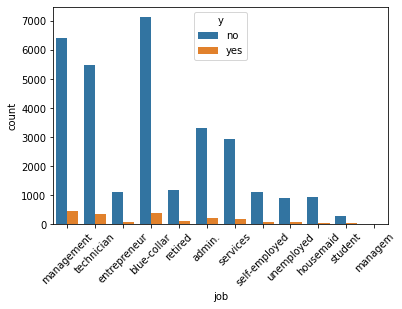

In [45]:
import seaborn as sns
pt = sns.countplot(x = df.job,hue = "y", data = df)
pt.tick_params(axis ="x", rotation = 45)

#Lable encoding

<AxesSubplot:ylabel='job'>

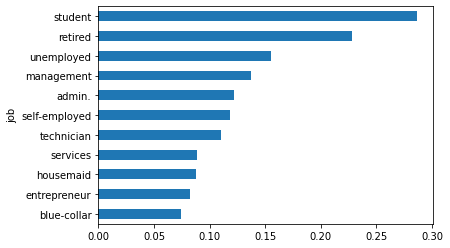

In [31]:
df.groupby("job")["target"].mean().sort_values().plot(kind="barh")

In [32]:
df.job = df.job.replace({"student":1, 
                         "retired":2,
                         "unemployed":3,
                         "management":4,
                         "admin.":5,
                         "self-employed":6,
                         "technician":7, 
                         "services":8, 
                         "housemaid":9,
                         "entrepreneur":10, 
                         "blue-collar":11})

<AxesSubplot:ylabel='education_qual'>

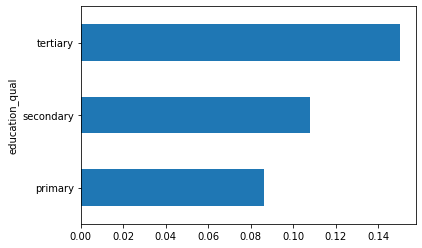

In [33]:
df.groupby("education_qual")["target"].mean().sort_values().plot(kind="barh")

In [34]:
df.education_qual = df.education_qual.replace({"tertiary":1, "secondary":2, "primary":3})

<AxesSubplot:ylabel='mon'>

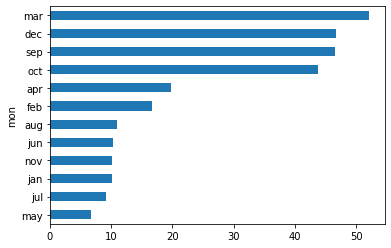

In [35]:
(df.groupby("mon")["target"].mean()*100).sort_values().plot(kind="barh")

In [36]:
df.mon = df.mon.replace({"mar":1, 
                         "dec":2,
                         "sep":3,
                         "oct":4, "apr":5,
                         "feb":6, "aug":7, 
                         "jun":8, "nov":9,
                         "jan":10, "jul":11, 
                         "may":12})

<AxesSubplot:ylabel='marital'>

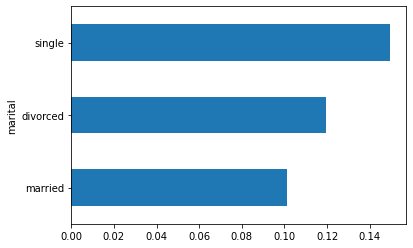

In [37]:
df.groupby("marital")["target"].mean().sort_values().plot(kind="barh")

In [38]:
df.marital = df.marital.replace({"single":1, "divorced":2, "married": 3})

<AxesSubplot:ylabel='call_type'>

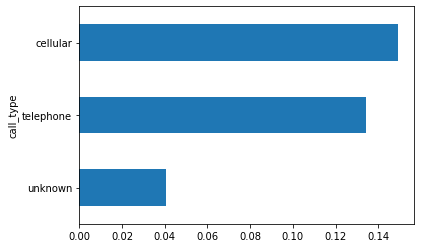

In [39]:
df.groupby("call_type")["target"].mean().sort_values().plot(kind="barh")

In [40]:
df.call_type = df.call_type.replace({"cellular":1, "telephone":2, "unknown":3})

<AxesSubplot:ylabel='prev_outcome'>

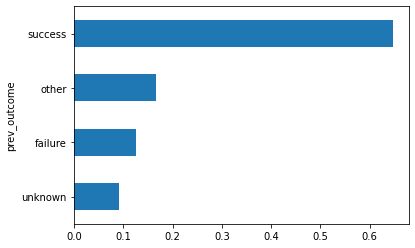

In [41]:
df.groupby("prev_outcome")["target"].mean().sort_values().plot(kind="barh")

In [42]:
df.prev_outcome = df.prev_outcome.replace({"success":1, "other":2, "failure": 3, "unknown":4})

<AxesSubplot:ylabel='day'>

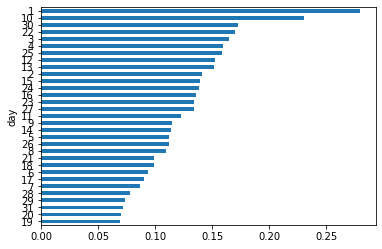

In [ ]:
df.groupby("day")["target"].mean().sort_values().plot(kind="barh")

In [ ]:
df.day = df.day.replace({1:1,
                         10:2,
                         30:3,
                         22:4, 3:5, 4:6, 25:7, 12:8, 13:9, 2:10, 15:11, 24:12, 
                         16:13, 23:14, 27:15, 11:16, 9:17, 14:18, 5:19, 26:20, 
                         8:21, 21:22, 18:23, 6:24, 17:25,7:26,28:27,29:28,31:29,
                         20:30,19:31})

<AxesSubplot:>

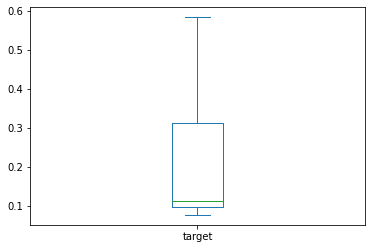

In [ ]:
df.groupby("age")["target"].mean().sort_values().plot(kind="box")

<AxesSubplot:xlabel='target', ylabel='age'>

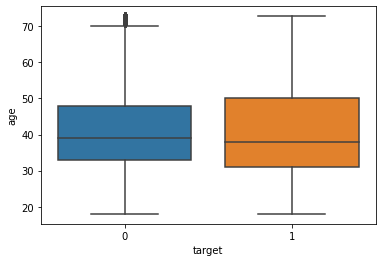

In [ ]:
sns.boxplot(x = df.target, y = df.age)

In [43]:
df = df.drop(['y'], axis =1)

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,4,3,1,3,19,12,261.000000,1.0,4,0
1,44.0,7,1,2,3,19,12,151.000000,1.0,4,0
2,33.0,10,3,2,3,19,12,76.000000,1.0,4,0
3,47.0,11,3,2,3,19,12,92.000000,1.0,4,0
4,33.0,11,1,2,3,19,12,198.000000,1.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,7,3,1,1,25,9,977.000000,3.0,4,1
45207,71.0,2,2,3,1,25,9,456.000000,2.0,4,1
45208,72.0,2,3,2,1,25,9,1030.798566,5.0,1,1
45209,57.0,11,3,2,2,25,9,508.000000,4.0,4,0


#splitting data

In [44]:
X = df.drop(['target'], axis=1)


y = df['target']

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [46]:
X_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
20228,57.000000,9,3,3,1,11,7,610.0,4.0,4
7901,25.000000,11,1,3,3,30,12,85.0,4.0,4
7342,48.000000,11,3,3,3,29,12,109.0,4.0,4
22254,33.000000,7,3,2,1,21,7,68.0,1.0,4
2405,55.000000,11,2,3,3,13,12,343.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...
11286,36.000000,8,3,2,3,18,8,111.0,2.0,4
44738,72.794478,2,3,2,2,8,3,606.0,3.0,1
38164,34.000000,11,3,2,1,15,12,160.0,1.0,3
860,33.000000,2,3,2,3,7,12,111.0,1.0,4


#Balancing train dataset

In [47]:
#oversampling smote
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

print('Original dataset shape %s' % Counter(y))

# Use SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Check the class distribution of the balanced dataset
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 39916, 1: 5289})
Resampled dataset shape Counter({1: 26776, 0: 26776})


In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion="gini", max_depth = 2)
dtc.fit(X_train,y_train)
#y_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
from sklearn.metrics import accuracy_score

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'auroc score {metrics.roc_auc_score(y_test,y_test_pred)}')

Train score 0.8977449070558325
Test score 0.893283281941279
auroc score 0.6517596687400377


In [54]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_test_pred)


print('Confusion matrix\n\n', cm)


Confusion matrix

 [[12731   409]
 [ 1183   595]]


In [63]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13140
           1       0.65      0.43      0.52      1778

    accuracy                           0.90     14918
   macro avg       0.79      0.70      0.73     14918
weighted avg       0.89      0.90      0.90     14918



#Random forest classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,y_train)
#y_pred = dtc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'auroc score {metrics.roc_auc_score(y_test,y_test_pred)}')


Train score 0.9999339650675207
Test score 0.9048129776109398
auroc score 0.7015876012073832


In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_res,y_res)
#y_pred = dtc.predict(X_test)
y_train_pred = rfc.predict(X_res)
y_test_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score

print(f'Train score {accuracy_score(y_train_pred,y_res)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'auroc score {metrics.roc_auc_score(y_test,y_test_pred)}')

Train score 0.9999813265610995
Test score 0.8873173347633732
auroc score 0.7774926678685712


#KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(X_train, y_train)  
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'auroc score {metrics.roc_auc_score(y_test,y_test_pred)}')

Train score 0.9115462079440024
Test score 0.8822898511864862
auroc score 0.6066130860354784


In [73]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(X_res, y_res)  
y_train_pred = knn.predict(X_res)
y_test_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn import metrics

print(f'Train score {accuracy_score(y_train_pred,y_res)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'auroc score {metrics.roc_auc_score(y_test,y_test_pred)}')


Train score 0.9341201075590081
Test score 0.8089556240782947
auroc score 0.7441956741708656


#Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train) 
y_pred = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with LR : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with LR : 0.8942


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_res,y_res) 
y_pred = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with LR : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with LR : 0.8350


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#XG boost

In [ ]:
import xgboost as xgb
XG = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [ ]:
XG.fit(X_train, y_train)
y_pred= XG.predict(X_test) 
from sklearn import metrics
XG_Score = metrics.roc_auc_score(y_test, y_pred)
XG_Score

[11:07:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9183255346506345

In [ ]:
from sklearn.naive_bayes import GaussianNB  
naive_bayes = GaussianNB()  
naive_bayes.fit(X_train, y_train)  

GaussianNB()

In [ ]:
NB_y_pred= naive_bayes.predict(X_test) 

In [ ]:
from sklearn import metrics
NB_Score = metrics.roc_auc_score(y_test,NB_y_pred)
NB_Score

0.7287033042102613

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)  
decision_tree.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
DT_y_pred= decision_tree.predict(X_test) 

In [ ]:
DT_Score = metrics.roc_auc_score(y_test,DT_y_pred)
DT_Score

0.7007033367404417